In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [4]:
db = pd.read_csv('DB/cars.csv', sep = ';')

In [22]:
pd.set_option('display.max_columns', None)

In [5]:
db.drop(['CODE'], axis=1)

,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,Potencia_,TRANS,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,PROVINCIA,...,REV_Garantia,Averia_grave,QUEJA_CAC,EDAD_COCHE,COSTE_VENTA,km_anno,Mas_1_coche,Revisiones,Edad Cliente,Tiempo
0,A,TIPO1,FUEL 1,Baja,M,Contado,CASADO,M,Empresa,Asturias,...,NO DATA,Averia muy grave,SI,2.08,2892,0,0,2,18,0
1,A,TIPO1,FUEL 1,Baja,M,Contado,CASADO,F,Empresa,Toledo,...,SI,No,NO,2.45,1376,7187,0,2,53,0
2,A,TIPO1,FUEL 1,Baja,M,Otros,CASADO,M,Empresa,Lerida,...,NO DATA,No,NO,2.51,1376,0,1,4,21,3
3,A,TIPO1,FUEL 1,Baja,M,Financiera Marca,CASADO,F,Empresa,Madrid,...,SI,Averia muy grave,SI,2.43,2015,7256,1,4,48,5
4,A,TIPO1,FUEL 1,Baja,M,Financiera Marca,CASADO,F,Funcionario,Santa Cruz de Tenerife,...,NO DATA,No,NO,2.30,1818,0,1,3,21,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58044,F,TIPO3,FUEL 1,Alta,M,Contado,SOLTERO,F,Empresa,Madrid,...,SI,Averia muy grave,SI,8.35,6832,12528,0,5,38,0
58045,K,TIPO7,FUEL 1,Alta,A,Contado,NaN,NaN,Empresa,Alicante,...,NO DATA,No,SI,7.68,0,22072,0,3,54,0
58046,K,TIPO7,FUEL 1,Alta,A,Contado,CASADO,M,Empresa,Madrid,...,NO DATA,No,NO,6.57,0,8352,0,8,63,0
58047,G,TIPO5,FUEL 2,Media,M,Contado,CASADO,M,Empresa,Zaragoza,...,NO DATA,No,NO,9.26,2786,10441,0,13,62,0


In [25]:
cat_col = db.select_dtypes(include=['object']).columns

In [35]:
le = LabelEncoder()
for col in cat_col:
    db[col] = le.fit_transform(db[col])
print(db.head())
    

    CODE  PRODUCTO  TIPO_CARROCERIA  COMBUSTIBLE  Potencia_  TRANS  \
0      0         0                0            0          1      1   
1  11111         0                0            0          1      1   
2  22222         0                0            0          1      1   
3  33333         0                0            0          1      1   
4  44444         0                0            0          1      1   

   FORMA_PAGO  ESTADO_CIVIL  GENERO  OcupaciOn  PROVINCIA  Campanna1  \
0           0             0       1          1          4          1   
1           0             0       0          1         47          0   
2           3             0       1          1         30          0   
3           2             0       0          1         32          1   
4           2             0       0          2         41          1   

   Campanna2  Campanna3  Zona _Renta  REV_Garantia  Averia_grave  QUEJA_CAC  \
0          0          0            2             0             2   

In [37]:
for col, mapping in cat_map.items():
    print(f"Columna: {col}")
    for category, encoded_value in mapping.items():
        print(f"  {category}: {encoded_value}")

In [16]:
boxplot(db)

   CODE PRODUCTO TIPO_CARROCERIA COMBUSTIBLE Potencia_ TRANS  \
0  CLI1        A           TIPO1      FUEL 1      Baja     M   
1  CLI2        A           TIPO1      FUEL 1      Baja     M   
2  CLI3        A           TIPO1      FUEL 1      Baja     M   
3  CLI4        A           TIPO1      FUEL 1      Baja     M   
4  CLI5        A           TIPO1      FUEL 1      Baja     M   

         FORMA_PAGO ESTADO_CIVIL GENERO    OcupaciOn               PROVINCIA  \
0           Contado       CASADO      M      Empresa                Asturias   
1           Contado       CASADO      F      Empresa                  Toledo   
2             Otros       CASADO      M      Empresa                  Lerida   
3  Financiera Marca       CASADO      F      Empresa                  Madrid   
4  Financiera Marca       CASADO      F  Funcionario  Santa Cruz de Tenerife   

  Campanna1 Campanna2 Campanna3 Zona _Renta REV_Garantia      Averia_grave  \
0        SI        NO        NO  Medio-Bajo      NO DATA

In [7]:
def heatmap(db):
    num_col = db.select_dtypes(include = ['float64', 'int64']).columns
    corr = db[num_col].corr()
    plt.figure(figsize=(12, 6))
    sns.heatmap(corr, annot=True, cmap='coolwarm')
    plt.title('Heatmap de correlacion')
    plt.show()


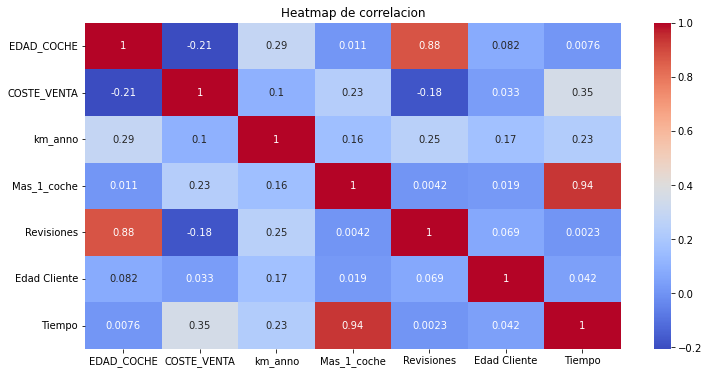

In [8]:
heatmap(db)

In [11]:
db.drop(['Tiempo', 'Revisiones'], axis=1, inplace=True)

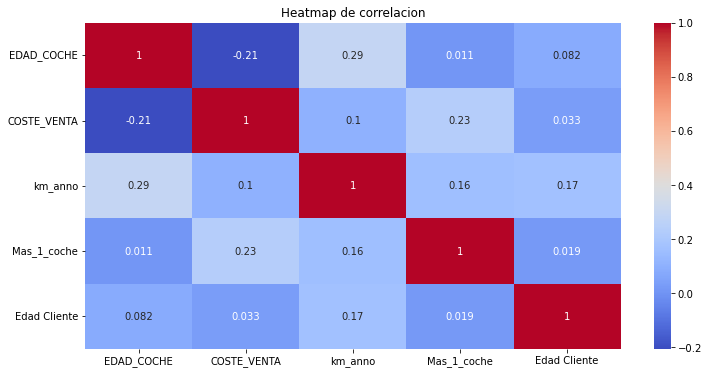

In [12]:
heatmap(db)